# Reading and evaluating a subset of data from Gaia's data release 3
> Patrick Stolowski
> 
> 20/02/2023


## Abstract: 
> Gaia is creating an extraordinarily precise three-dimensional map of more than a thousand million stars throughout our Milky Way galaxy and beyond, mapping their motions, luminosity, temperature and composition. This huge stellar census will provide the data needed to tackle an enormous range of important questions related to the origin, structure and evolutionary history of our galaxy.

With the [newly released data from Gaia’s mission](https://gea.esac.esa.int/archive/documentation/GDR3/) (GDR3), we will look at extracting the data from the library and using the following headings:
-	Luminosity: `lum_flame`
-	Mass of stars: `mass_flame`
-	Age of stars: `age_flame`
-	Evolutionary stage: `evolstage_flame`
-	Temperature efficiency: `teff_gspphot`
-	Magnitude: `mg_gspphoh`

we will try to construct the *Hertzsprung-Russell diagram* and see what other relationships exist within the data.

**Key Words**
- BaSTI = a Bag of Stellar Tracks and Isochrones ([Updated BaSTI Stellar Evolution Models and Isochrones](https://iopscience.iop.org/article/10.3847/1538-4357/abd4d5/pdf))
- FLAME = Final Luminosity Age Mass Estimator 
- GspPhot = The template APs are the closest to the star APs obtained by a preliminary version of the atmospheric parameter pipeline GspPhot
  
**[Evolution Stage FLAME](https://gea.esac.esa.int/archive/documentation/GDR3/Gaia_archive/chap_datamodel/sec_dm_astrophysical_parameter_tables/ssec_dm_astrophysical_parameters.html#astrophysical_parameters-evolstage_flame) adapted from the [BASTI](http://basti-iac.oa-teramo.inaf.it/readme.html) model grid** 

- 100= zero age main sequence (ZAMS)
- 300= first minimum of Teff for massive stars or central hydrogen mass fraction = 0.30 for low-mass stars
- 360= main sequence turn-off
- 420= central hydrogen mass fraction = 0.00
- 490= base of the red giant branch (RGB)
- 860= maximum L along the RGB bump
- 890 = minimum L along the RGB bump
- 1290 = tip of the RGB


## Reading the Data
In this section we will read the data from the URL using Pandas library for python, we will extract data points from the columns under the Headings. The data will be filtered such that all of the data points contain no NULL values in our code as it may cause some issues while graphing the data points with NULL values will be dropped from the data set preventing us from encountering any possible errors. Only data that contains all *6* data points in each column will be used from Gaia's data library. In this report we will be using only a subset of GDR3 which consists of 80096 data points which contain all *6* data points in each column.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm
from matplotlib.cm import ScalarMappable
import numpy as np


# NOTE: The code needs to be run once to import the csv and filter the data from NULL values skipping the first 1541
# URL for the data used: http://cdn.gea.esac.esa.int/Gaia/gdr3/Astrophysical_parameters/astrophysical_parameters/AstrophysicalParameters_000000-003111.csv.gz
# Gaia data release 3 Astrophysical parameters for public access

url = 'http://cdn.gea.esac.esa.int/Gaia/gdr3/Astrophysical_parameters/astrophysical_parameters/AstrophysicalParameters_000000-003111.csv.gz'
analysis_headers = ['lum_flame','mass_flame','age_flame','evolstage_flame','teff_gspphot','mg_gspphot']
gaia_data_releas_3 = pd.read_csv(url, compression='gzip', on_bad_lines='skip', header=1541) # first data set from gaia data set 3
tamelmg = gaia_data_releas_3[analysis_headers].dropna()
tamelmg


C:\Users\patri\AppData\Local\Temp\ipykernel_10744\4256040726.py:14: DtypeWarning: Columns (147) have mixed types. Specify dtype option on import or set low_memory=False.
  gaia_data_releas_3 = pd.read_csv(url, compression='gzip', on_bad_lines='skip', header=1541) # first data set from gaia data set 3


,lum_flame,mass_flame,age_flame,evolstage_flame,teff_gspphot,mg_gspphot
2,0.226447,0.769590,3.272666,145.0,4708.7944,6.3344
7,0.158082,0.688121,3.736896,289.0,4333.8650,7.3503
16,0.058487,0.544327,11.765711,172.0,3595.7598,7.9835
34,1.291883,0.990828,7.868940,337.0,5819.5605,4.4540
40,1.545994,0.943559,12.637042,410.0,5653.0347,3.3807
...,...,...,...,...,...,...
522804,0.104576,0.611436,1.482193,288.0,4174.2070,7.6612
522818,1.333100,0.984907,8.773539,350.0,5848.9277,4.3709
522819,6.835367,1.478028,2.847503,476.0,5422.5503,2.3473
522833,0.065154,0.560360,11.333377,199.0,3711.1218,8.4700


## Data overview:

Now we will use the data we extracted from Gaia and visually represent the relationships using *matplotlib* we will construct a 2D graph with three parameters x, y and color to show a clear representation of the relationships with additional depth shown in the color. 

With the data presented on a graph we will:
- analyze their relationship
- compare the graphs
- comment on the similarities with significant or slight differentiation in color range



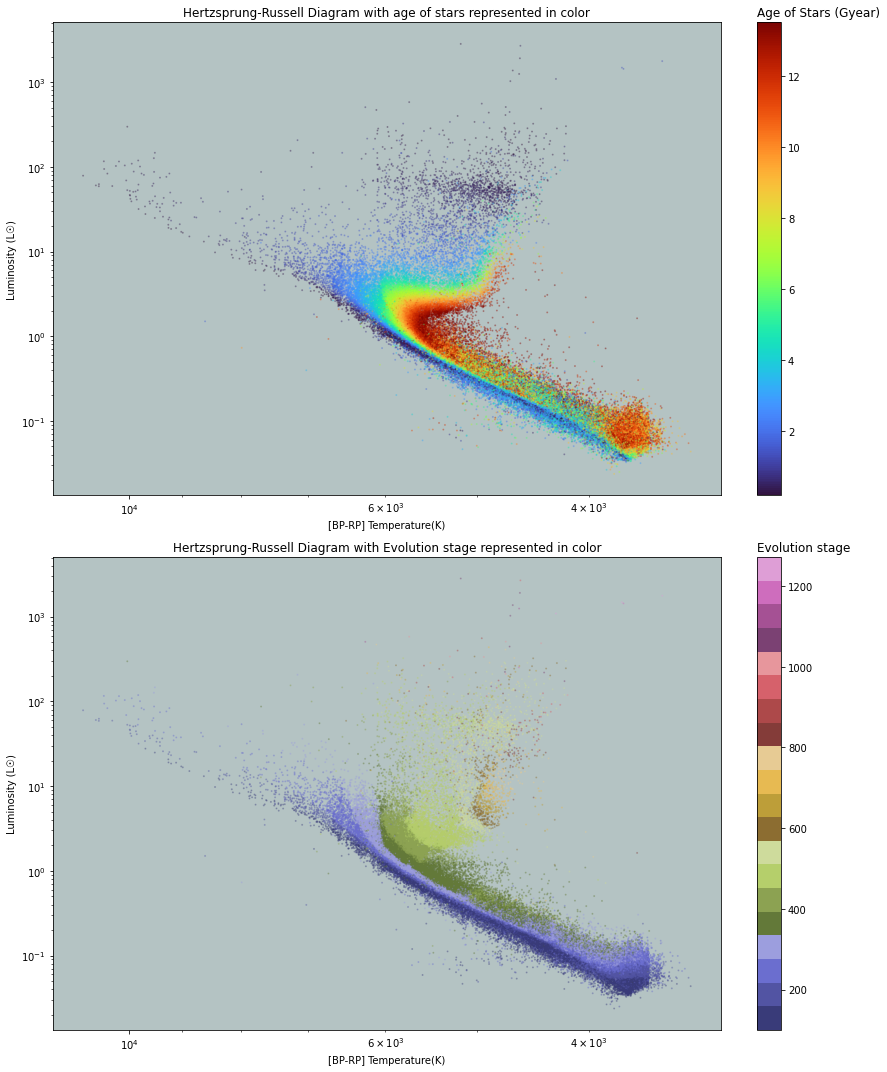

In [2]:
# Plotting the data using matplotlib
fig, ([ax1, ax2], [ax3, ax4]) =  plt.subplots(2,2, figsize=(20, 15), dpi=72)

ax1.set_title("Hertzsprung-Russell Diagram with age of stars represented in color")
# Creates a scatter plot graph with x and y log scale values
ax1.scatter(
    tamelmg.teff_gspphot,
    tamelmg.lum_flame,
    alpha=0.3,
    s=1,
    c=tamelmg.age_flame, # we log the c value since x and y are log scale
    cmap="turbo",
)
ax1.invert_xaxis() # we invert such that the temperature matches BP-RP color
ax1.set_facecolor("#B4C3C3")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel("[BP-RP] Temperature(K)")
ax1.set_ylabel("Luminosity (L☉)")
# Creating a colorbar to represent the color values from min to max 

fraction = 1  # Fraction of original axes to use for colorbar
# log the values used in colorbar to match the color values used in  
norm = Normalize(vmin=tamelmg.age_flame.min(), vmax=tamelmg.age_flame.max())
# parameters for colorbar
cbar = ax2.figure.colorbar(
    ScalarMappable(norm=norm, cmap="turbo"),
    ax=ax2,
    pad=0.05,
    fraction=fraction,
)
ax2.set_title("Age of Stars (Gyear)", loc = 'left')
ax2.axis('off') # Turn the x- and y-axis off.

#---------------------------------------------------------------------------------------

ax3.set_title("Hertzsprung-Russell Diagram with Evolution stage represented in color")
ax3.scatter(
    tamelmg.teff_gspphot,
    tamelmg.lum_flame,
    alpha=0.3,
    s=1,
    c=tamelmg.evolstage_flame,
    cmap="tab20b",
)
ax3.invert_xaxis()
ax3.set_facecolor("#B4C3C3")
ax3.set_xscale("log")
ax3.set_yscale("log")
ax3.set_xlabel("[BP-RP] Temperature(K)")
ax3.set_ylabel("Luminosity (L☉)")

fraction = 1  # .05

norm = Normalize(vmin=tamelmg.evolstage_flame.min(), vmax=tamelmg.evolstage_flame.max())

cbar = ax4.figure.colorbar(
    ScalarMappable(norm=norm, cmap="tab20b"),
    ax=ax4,
    pad=0.05,
    fraction=fraction,
)
ax4.set_title("Evolution stage", loc = 'left')
ax4.axis('off')

plt.tight_layout() # automatically adjusts subplot parameters so that the subplot(s) fits in to the figure area.
plt.show()


With the data we represented the Luminosity vs Temperature by graphing the log values for both the x- and y-axes with the addition of color giving the graph more visual depth, we flip the *Temperature* axes to align it with the blue and red photometers([BP/RP](https://www.cosmos.esa.int/web/gaia/dr3-what-colour-do-they-have)). we see that resulting graph is taking shape similar to [Gaia's Hertzsprung-Russell diagram](https://sci.esa.int/web/gaia/-/60198-gaia-hertzsprung-russell-diagram). The data we used in our case is significantly smaller in size which cuts out the *Giant branch and the missing data for white dwarf stars*.

In fig:1 we see an familiar pattern, looking at the colorbar we see that the *Luminosity* so almost linearly proportional to the temperature but we see that between 4x10<sup>3</sup> and 6x10<sup>3</sup> their is a branch sprouting where the linear proportionality breaks thus the increase in *Luminosity* is greater than the *Temperature* increase. Comparing the color data between fig:1 and fig:2 we see that the Evolution of Stars and the Age of stars are not equal to one another. it is safe to assume that all stars age differently we visualize this data later on.

We also can see a similarity with between the fig:1 and fig:2 where both graphs show a small portion of stars in the same position on both colorbars between along the spine of the main branch of the data showing stars in their youthful(Blue) and in their ZAMS stage of evolution(Blue) along the spine on the Trunk of the data set. 




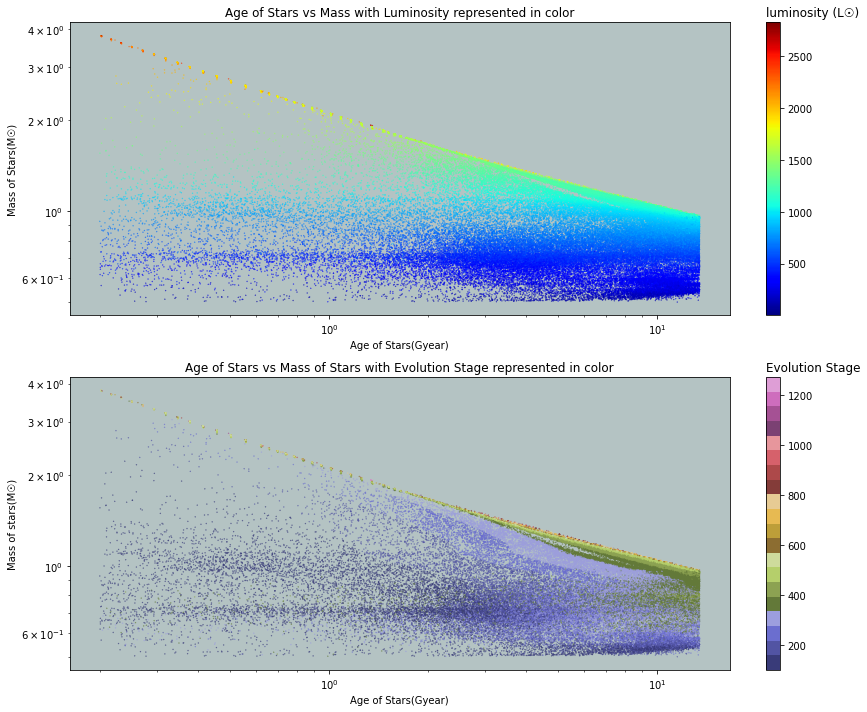

In [3]:
fig, ([ax1, ax2], [ax3, ax4]) =  plt.subplots(2,2, figsize=(20, 10), dpi=72)
ax1.set_title("Age of Stars vs Mass with Luminosity represented in color")
ax1.scatter(
    tamelmg.age_flame,
    tamelmg.mass_flame,
    s=0.1,
    c=np.log(tamelmg.lum_flame),
    cmap="jet",
    
)
ax1.set_facecolor("#B4C3C3")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel("Age of Stars(Gyear)")
ax1.set_ylabel("Mass of Stars(M☉)")

fraction = 1  # .05
norm = Normalize(vmin=tamelmg.lum_flame.min(), vmax=tamelmg.lum_flame.max())
cbar = ax2.figure.colorbar(
    ScalarMappable(norm=norm, cmap="jet"),
    ax=ax2,
    pad=0.05,
    fraction=fraction,
)
ax2.set_title("luminosity (L☉)", loc = 'left')
ax2.axis("off")

#---------------------------------------------------------------------------------------------

ax3.set_title("Age of Stars vs Mass of Stars with Evolution Stage represented in color")
ax3.scatter(
    tamelmg.age_flame,
    tamelmg.mass_flame,
    s=0.1,
    c=tamelmg.evolstage_flame,
    cmap="tab20b",
)
ax3.set_facecolor("#B4C3C3")
ax3.set_xscale("log")
ax3.set_yscale("log")
ax3.set_xlabel("Age of Stars(Gyear)")
ax3.set_ylabel("Mass of stars(M☉)")

fraction = 1  # .05
norm = Normalize(vmin=tamelmg.evolstage_flame.min(), vmax=tamelmg.evolstage_flame.max())
cbar = ax4.figure.colorbar(
    ScalarMappable(norm=norm, cmap="tab20b"),
    ax=ax4,
    pad=0.05,
    fraction=fraction,
)
ax4.set_title("Evolution Stage", loc = 'left')
ax4.axis("off")
plt.tight_layout()
plt.show()


In our second set of data consisting of fig:3 and fig:4 we plot the *Mass of stars* vs *Age of stars* in a log scale, the graphs show a linear degradation on both graphs which visually represents that stars with a large mass have a extremely short lifespan compared to stars with significantly lower mass this shows us that stars with larger mass use up their fuel much faster than stars with lower mass making the star evolve faster, this is visualy represented in fig:4 in our colorbar. A significant portion of our data lays on the far right of the graph this vividly show us that most of the stars in our data were born in a similar time period most likely when our galaxy was most active (Although this is an assumption we should try implement more data to our graphs from [GDR3 library](https://cdn.gea.esac.esa.int/Gaia/gdr3/Astrophysical_parameters/astrophysical_parameters/), and compare it with the time frame from when our galaxy was most to least active).  

In fig:3 we see that high luminosity stars consist largely of stars with immense mass and in fig:4 we see that these stars although youthful compared to the stars with lower mass, some of these stars are on their late stage in their *base of the red giant branch(RGB)* evolution. In fig:4 we can see a limit to stars with a given mass and age, this is mostlikely due to using only one Subset off data from GDR3.

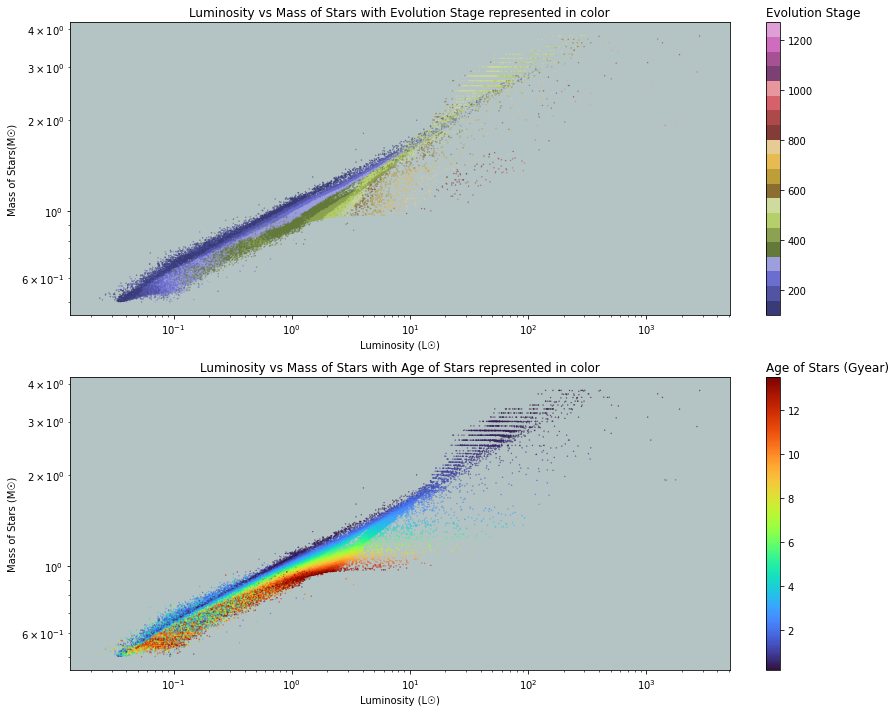

In [4]:
fig, ([ax1, ax2], [ax3, ax4]) =  plt.subplots(2,2, figsize=(20, 10), dpi=72)
ax1.set_title("Luminosity vs Mass of Stars with Evolution Stage represented in color")
ax1.scatter(
    tamelmg.lum_flame,
    tamelmg.mass_flame,
    s=0.1,
    c=tamelmg.evolstage_flame,
    cmap="tab20b",
)
ax1.set_facecolor("#B4C3C3")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel("Luminosity (L☉)")
ax1.set_ylabel("Mass of Stars(M☉)")


fraction = 1  # .05
norm = Normalize(vmin=tamelmg.evolstage_flame.min(), vmax=tamelmg.evolstage_flame.max())
cbar = ax2.figure.colorbar(
    ScalarMappable(norm=norm, cmap="tab20b"),
    ax=ax2,
    pad=0.05,
    fraction=fraction,
)
ax2.set_title('Evolution Stage', loc = 'Left')
ax2.axis("off")

#--------------------------------------------------------------------------------------

ax3.set_title("Luminosity vs Mass of Stars with Age of Stars represented in color")
ax3.scatter(
    tamelmg.lum_flame,
    tamelmg.mass_flame,
    s=0.1,
    c=tamelmg.age_flame,
    cmap="turbo",
)
ax3.set_facecolor("#B4C3C3")
ax3.set_xscale("log")
ax3.set_yscale("log")
ax3.set_xlabel("Luminosity (L☉)")
ax3.set_ylabel("Mass of Stars (M☉)")


fraction = 1  # .05
norm = Normalize(vmin=tamelmg.age_flame.min(), vmax=tamelmg.age_flame.max())
cbar = ax4.figure.colorbar(
    ScalarMappable(norm=norm, cmap="turbo"),
    ax=ax4,
    pad=0.05,
    fraction=fraction,
)
ax4.set_title('Age of Stars (Gyear)', loc = 'Left')
ax4.axis("off")
plt.tight_layout()
plt.show()


In our third set of data we graph the *Luminosity* vs *Mass of Stars* represented in fig:5 and Fig:6, we see an approximate linear proportionality between these values this was first noted by [Jakob Karl Ernst Halm](https://en.wikipedia.org/wiki/Mass%E2%80%93luminosity_relation) in the *Mass-luminosity relation*. Evaluating the colorbar data on the evolution stage in fig:5 we see that the stars with large masses and hight luminosity between the values of 10<sup>0</sup> and mass of 2x10<sup>0</sup> are still in there early stages of evolution but as the data increase in luminosity but not in mass we see that the evolution stage is almost linear proportional to the luminosity.

In fig:6 the colorbar shows the exact opposite behavior to the *Mass-luminosity relation* we see that oldest stars are closer to the origin while the more youthful stars are significantly further away from the origin. This colored data set gives us a perfect visual representation showing us the life expectancy in a stars based on their mass and luminosity, we see that stars with lower mass live significantly longer due to their lower consumption rate of their fuel slowing down their evolution, we can see in fig:5 that the eldest stars with luminosity between 10<sup>0</sup> and 10<sup>0.5</sup> and less than or equal to 10<sup>0</sup> are mostly in their central hydrogen mass fraction = 0.00 and RGB stages of evolution while the young massive stars larger than 2x10<sup>0</sup>  and luminosity between 10<sup>1</sup> and 10<sup>2</sup> are approaching the maximum luminosity of the RGB bump stage of evolution.

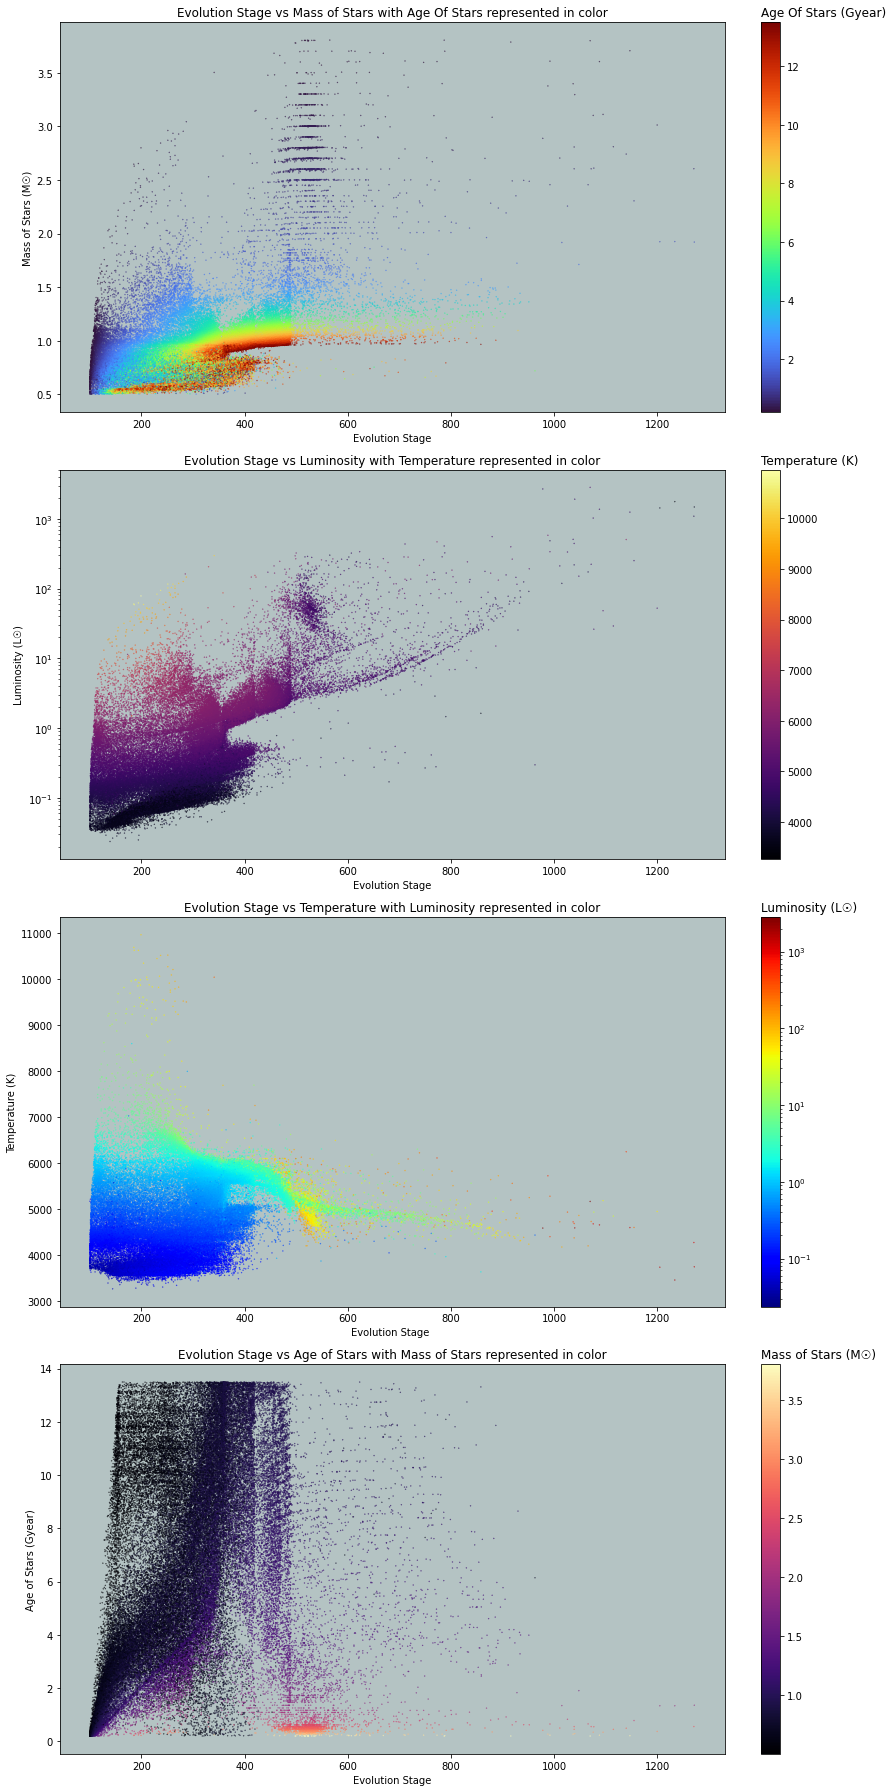

In [5]:
fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]) =  plt.subplots(4,2, figsize=(20, 25), dpi=72)
ax1.set_title("Evolution Stage vs Mass of Stars with Age Of Stars represented in color")
ax1.scatter(
    tamelmg.evolstage_flame,
    tamelmg.mass_flame,
    s=0.1,
    c=tamelmg.age_flame,
    cmap="turbo",
)
ax1.set_facecolor("#B4C3C3")
ax1.set_xlabel("Evolution Stage")
ax1.set_ylabel("Mass of Stars (M☉)")


fraction = 1  # .05
norm = Normalize(vmin=tamelmg.age_flame.min(), vmax=tamelmg.age_flame.max())
cbar = ax2.figure.colorbar(
    ScalarMappable(norm=norm, cmap="turbo"),
    ax=ax2,
    pad=0.05,
    fraction=fraction,
)
ax2.set_title('Age Of Stars (Gyear)', loc = 'left')
ax2.axis("off")

#--------------------------------------------------------------------------------------

ax3.set_title("Evolution Stage vs Luminosity with Temperature represented in color")
ax3.scatter(
    tamelmg.evolstage_flame,
    tamelmg.lum_flame,
    s=0.1,
    c=tamelmg.teff_gspphot,
    cmap="inferno"
)
ax3.set_facecolor('#B4C3C3')
ax3.set_yscale("log")
ax3.set_xlabel("Evolution Stage")
ax3.set_ylabel("Luminosity (L☉)")

fraction = 1  # .05
norm = Normalize(vmin=tamelmg.teff_gspphot.min(), vmax=tamelmg.teff_gspphot.max())
cbar = ax4.figure.colorbar(
    ScalarMappable(norm=norm, cmap="inferno"),
    ax=ax4,
    pad=0.05,
    fraction=fraction,
)
ax4.set_title('Temperature (K)', loc = 'left')
ax4.axis("off")

#-----------------------------------------------------------------------------------

ax5.set_title("Evolution Stage vs Temperature with Luminosity represented in color")
ax5.scatter(
    tamelmg.evolstage_flame,
    tamelmg.teff_gspphot,
    s=0.1,
    c=np.log(tamelmg.lum_flame),
    cmap="jet",
)
ax5.set_facecolor("#B4C3C3")
ax5.set_xlabel("Evolution Stage ")
ax5.set_ylabel("Temperature (K)")

fraction = 1  # .05
norm = LogNorm(vmin=tamelmg.lum_flame.min(), vmax=tamelmg.lum_flame.max())
cbar = ax6.figure.colorbar(
    ScalarMappable(norm=norm, cmap="jet"),
    ax=ax6,
    pad=0.05,
    fraction=fraction,
)
ax6.set_title('Luminosity (L☉)', loc = 'left')
ax6.axis("off")

#-------------------------------------------------------------------------------------

ax7.set_title("Evolution Stage vs Age of Stars with Mass of Stars represented in color")
ax7.scatter(
    tamelmg.evolstage_flame,
    tamelmg.age_flame,
    s=0.1,
    c=tamelmg.mass_flame,
    cmap="magma"
)
ax7.set_facecolor('#B4C3C3')
ax7.set_xlabel("Evolution Stage")

ax7.set_ylabel("Age of Stars (Gyear)")


fraction = 1  # .05
norm = Normalize(vmin=tamelmg.mass_flame.min(), vmax=tamelmg.mass_flame.max())
cbar = ax8.figure.colorbar(
    ScalarMappable(norm=norm, cmap="magma"),
    ax=ax8,
    pad=0.05,
    fraction=fraction,
)
ax8.set_title('Mass of Stars (M☉)', loc = 'left')
ax8.axis("off")
plt.tight_layout()
plt.show()


Our final set of graphs represent each value in our data graphed against Evolution stage, this visually represents a unique development for each individual property of the stars as they evolve at different rates over time. We see in pervious graph fig:5 and fig:6 mass and luminosity had an approximate linear proportionality in fig:7 and fig:8 we see that they continue the relation until we reach a value of approximate 380 on the evolution stage we see a drastic change in their linear proportionality between these values according to the data we graphed.

We know from the [Stefan–Boltzmann law](https://en.wikipedia.org/wiki/Stefan%E2%80%93Boltzmann_law) that luminosity depends on temperature to the 4<sup>th</sup> power, we see fig:7, fig:8 and fig:9 in there early stages of evolution the stars mass, luminosity and temperature seem to have a similar logarithmic relationship with a noticeable a cut off point when they approach the value of 380 on the evolution stage, the similarity in the data diverges in uniquely individual ways as they reach there final stages of evolution. 

In fig:10 the age of stars vs evolution stage graph has an extremely high logarithmic relation with a cut off point as it reaches the maximum age value of 14 Gyears on the data. Most of our values in this data set represent low mass stars in there ZAMS, first minimum of Teff for massive stars or central hydrogen mass fraction = 0.30 for low-mass stars and main sequence turn-off stage of evolution these stars are also the eldest stars in our data set.

## Conclusion:

In this project we looked at reading one set of data from [GDR3](https://gea.esac.esa.int/archive/documentation/GDR3/) library, we were only interested in a specific set of data which consists of values under each of the **headings**, dropping all the rows with null values and the columns we are not interested. When we graphed each of the individual headings and their values we notice missing strips of data caused by either removing the null values or by using one data set. The Hertzsprung-Russell Diagram we constructed is missing data for white dwarf stars and the main branch which we can see in [gaia's Hertzsprung-Russell diagram](https://sci.esa.int/web/gaia/-/60198-gaia-hertzsprung-russell-diagram) based on their second data release. 

In our *mass vs age* evaluation we visualized a linear degradation with a limit to a stars age and its mass while the colorbars gave more depth showing us the sort of relationship that the data sets might have we see that majority of our stars in our data very old. In *mass vs luminosity* graphs we see an approximate linear trend for most of the data but at approximate mass of 10<sup>0</sup> and luminosity 10<sup>0</sup> some of the data diverges from the linear trend we see that the luminosity increases but stars have a similar mass. We see all of the trends vividly in our last set of graph data where we graph all of the individual sets of values agents their evolution stage we see similarity's in luminosity, mass and temperature, each of their graphs consist of a logarithmic relationship until they reach an approximate value of 380 on the evolution axis we see that the mass in stars plateaus while the luminosity increases with the evolution stage, the temperature in the evolution stages drastically decreases and progresses into an almost linear trend with more data we can expect to see a clearer relation between temperature, mass and luminosity. We see that the age of stars and the evolution stage have a quadratic relation these approximations hold better we see that there is a limit to our age as the isochrones cover an age range between 20 Myr and 14.5 Gyr, including consistently the pre-main-sequence phase if we try implement all of [GDR3](https://gea.esac.esa.int/archive/documentation/GDR3/) and evaluate all of their points on graph, this would show us a more clearer image of the our stars in our galaxy we could use all of gaia's data from [GDR1 library](http://cdn.gea.esac.esa.int/Gaia/gdr1/gaia_source/csv/), [GDR2 library](http://cdn.gea.esac.esa.int/Gaia/gdr2/gaia_source/csv/) and [GDR3 library](http://cdn.gea.esac.esa.int/Gaia/gdr3/Astrophysical_parameters/astrophysical_parameters/) with all of the data we could see if these relations hold with all of the stars that gaia has a record on thus far. In a future project we should try implement machine learning environment that can predict stelar evolution and try predict how each of these stars will evolve over time.